# Explore Exercises

- Do your work for this exercise in a notebook named explore. Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

- For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from datetime import timedelta, datetime

import warnings
warnings.filterwarnings("ignore")

In [2]:
# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

In [3]:
url = "https://gist.githubusercontent.com/ryanorsinger/0ec766c66f4089bdcbc1d4fb294a3394/raw/197c1f0d7b55a45f29437811bc73d9c4ef8af647/sa_temps.csv"
df = pd.read_csv(url, index_col='datetime', parse_dates=True).sort_index()
df.temp = (df.temp - 273.15) * 1.8 + 32

print('Date Range:', df.index.min(), 'to', df.index.max())
print('Shape:', df.shape)

df.head(10)

Date Range: 2012-10-01 13:00:00 to 2017-11-30 00:00:00
Shape: (45252, 1)


,temp
datetime,
2012-10-01 13:00:00,61.052000
2012-10-01 14:00:00,61.076568
2012-10-01 15:00:00,61.139294
2012-10-01 16:00:00,61.202020
2012-10-01 17:00:00,61.264747
2012-10-01 18:00:00,61.327473
2012-10-01 19:00:00,61.390200
2012-10-01 20:00:00,61.452926
2012-10-01 21:00:00,61.515652


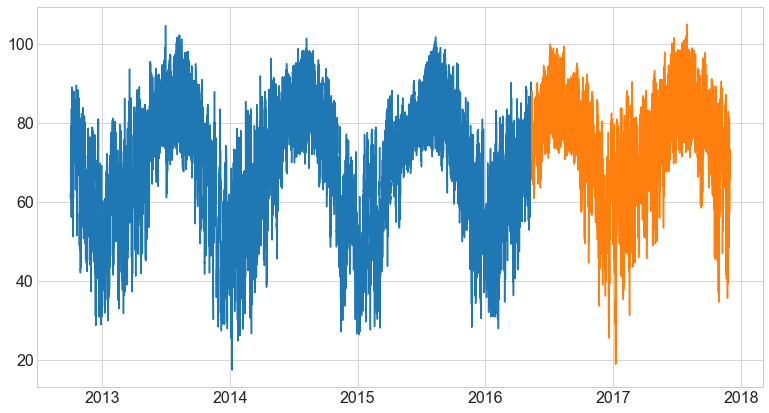

In [4]:
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.index, train.temp)
plt.plot(test.index, test.temp)

In [5]:
y = train.temp
y.head()

datetime
2012-10-01 13:00:00    61.052000
2012-10-01 14:00:00    61.076568
2012-10-01 15:00:00    61.139294
2012-10-01 16:00:00    61.202020
2012-10-01 17:00:00    61.264747
Name: temp, dtype: float64

<AxesSubplot:xlabel='datetime'>

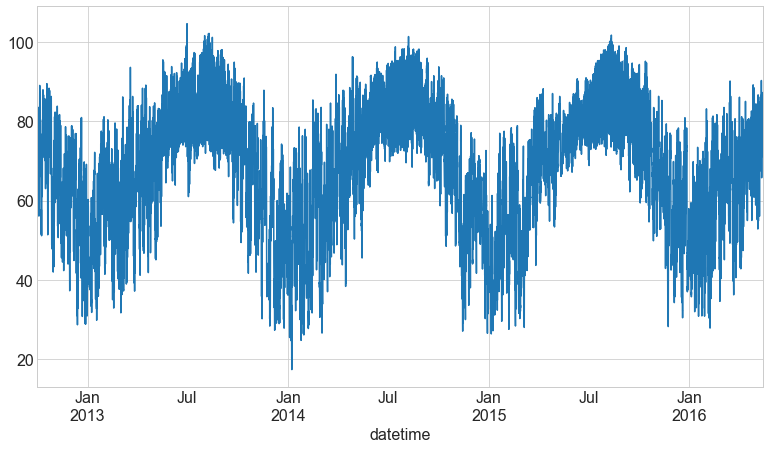

In [6]:
y.plot()

<AxesSubplot:>

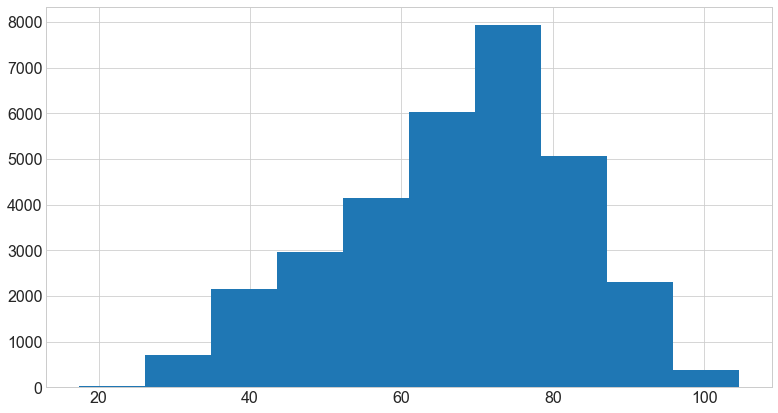

In [7]:
y.hist()

<AxesSubplot:>

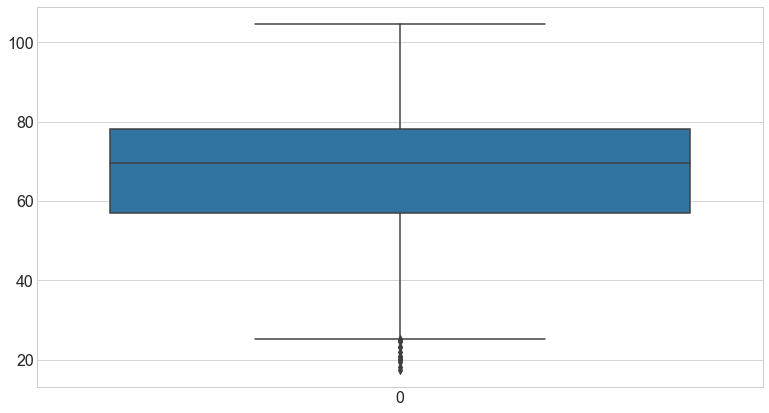

In [8]:
sns.boxplot(data=y)

<AxesSubplot:xlabel='weekday', ylabel='temp'>

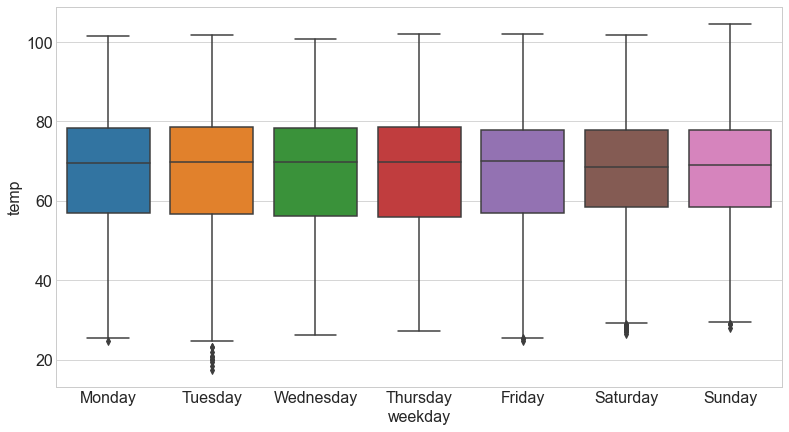

In [9]:
(
    y.reset_index()
    .assign(weekday=lambda df: df.datetime.dt.day_name())
    .pipe((sns.boxplot, 'data'), y='temp', x='weekday')
)

In [10]:
# getting the store data 
df = pd.read_csv('complete_store_data.csv')
df.head()

,key_0,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,item,sale_amount,sale_date,sale_id,store,store_address,store_city,store_id,store_state,store_zipcode
0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
2,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
3,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,13.0,"Fri, 04 Jan 2013 00:00:00 GMT",4,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253
4,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,10.0,"Sat, 05 Jan 2013 00:00:00 GMT",5,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253


In [12]:
# Convert date column to datetime format.
df.sale_date = pd.to_datetime(df.sale_date)

In [13]:
df = df.drop(columns=['item', 'store'])

In [16]:
# Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.
#df['month'] = df.index.month_name()
#df['day_of_week'] = df.index.day_name()
df['sales_total'] = df.sale_amount * df.item_price

df.head()

,key_0,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,sale_amount,sale_date,sale_id,store_address,store_city,store_id,store_state,store_zipcode,sales_total
0,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,13.0,2013-01-01 00:00:00+00:00,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,10.92
1,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,11.0,2013-01-02 00:00:00+00:00,2,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,9.24
2,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,14.0,2013-01-03 00:00:00+00:00,3,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,11.76
3,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,13.0,2013-01-04 00:00:00+00:00,4,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,10.92
4,1,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,10.0,2013-01-05 00:00:00+00:00,5,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,8.40


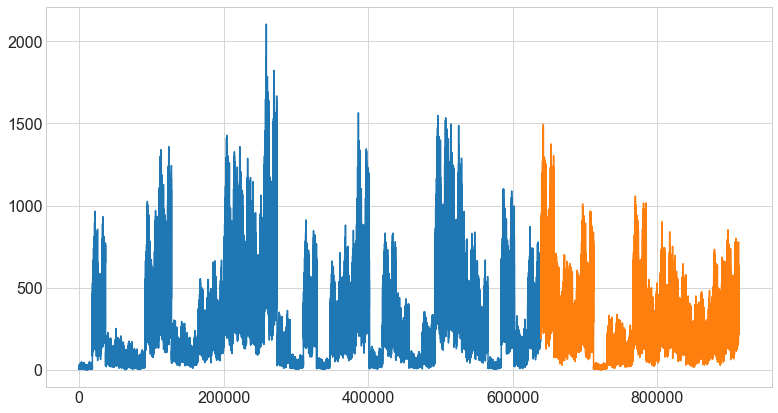

In [18]:
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.sales_total)
plt.plot(test.sales_total)

<AxesSubplot:>

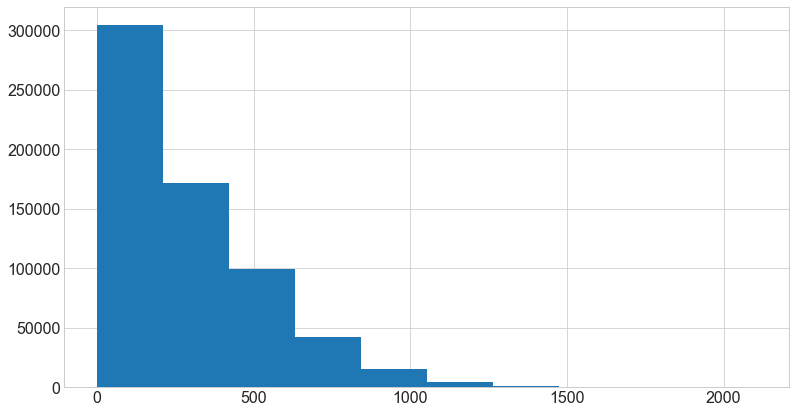

In [20]:
train.sales_total.hist()

<AxesSubplot:>

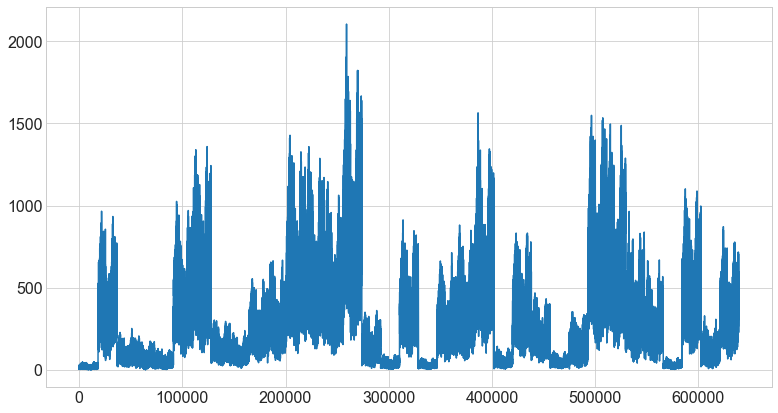

In [21]:
train.sales_total.plot()

In [22]:
y = train.sales_total

In [24]:
y.head()

0    10.92
1     9.24
2    11.76
3    10.92
4     8.40
Name: sales_total, dtype: float64

<AxesSubplot:>

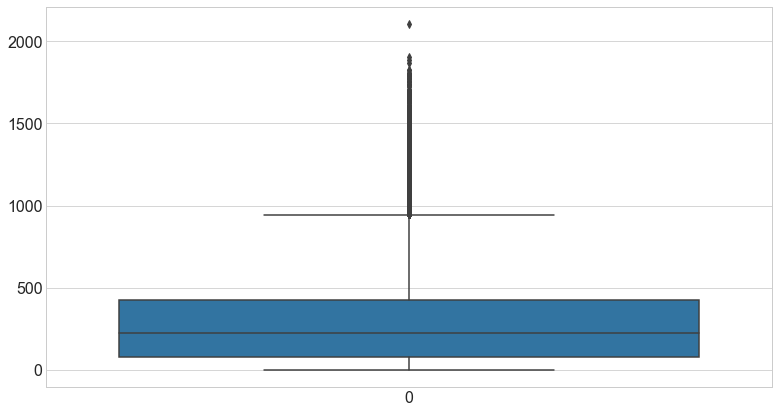

In [25]:
sns.boxplot(data=y)

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

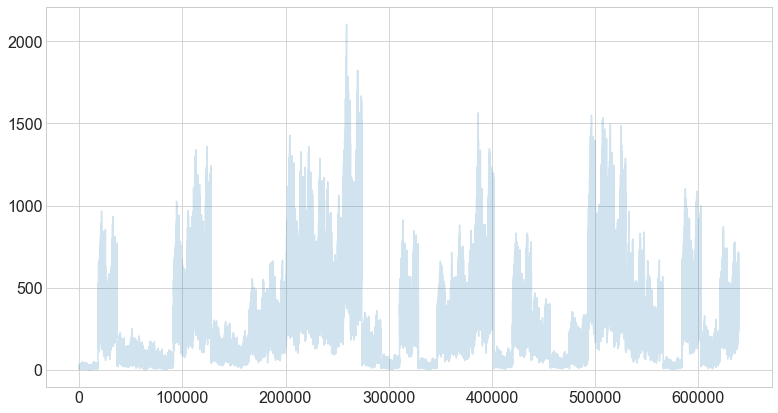

In [26]:
y.plot(alpha=.2, label='Hourly')
y.resample('D').mean().rolling(3).mean().plot(alpha=.5, label='3 day')
y.resample('D').mean().rolling(7).mean().plot(alpha=8, label='1 week')
plt.legend()